### 1. DATA CLEANING

**A) Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

**B) Read Dataset**
<a id="read_dataset" > </a>

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
# Menampilkan 5 data teratas
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32580 entries, 0 to 32579
Data columns (total 12 columns):
person_age                    32580 non-null int64
person_income                 32580 non-null int64
person_home_ownership         32580 non-null object
person_emp_length             32580 non-null float64
loan_intent                   32580 non-null object
loan_grade                    32580 non-null object
loan_amnt                     32580 non-null int64
loan_int_rate                 29464 non-null float64
loan_status                   32580 non-null int64
loan_percent_income           32580 non-null float64
cb_person_default_on_file     32580 non-null object
cb_person_cred_hist_length    32580 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Menampilkan statistik deskriptif dari dataset
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32580.000000,3.258000e+04,32580.000000,32580.000000,29464.000000,32580.000000,32580.000000,32580.000000
mean,27.731031,6.589271e+04,4.767772,9589.511971,11.011637,0.218171,0.170209,5.803622
std,6.315410,5.254702e+04,4.087238,6322.132541,3.240499,0.413010,0.106779,4.053669
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**C) Handling Outlier**

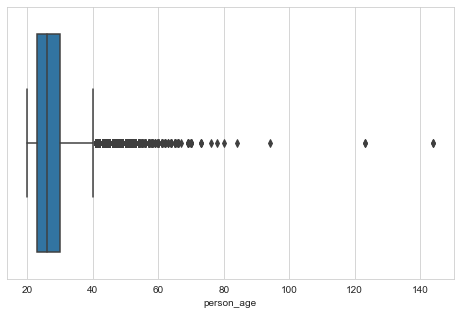

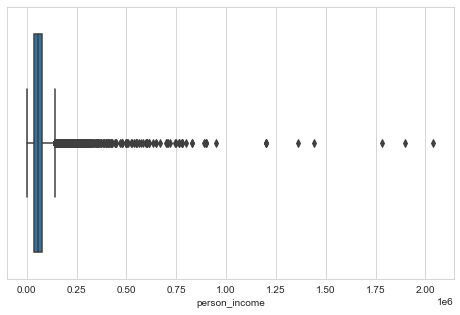

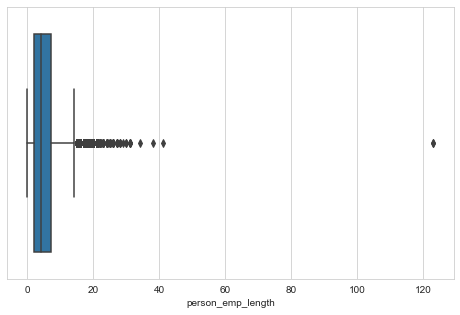

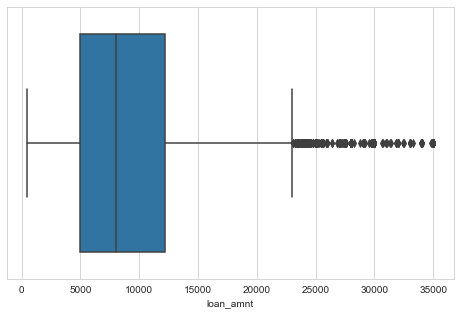

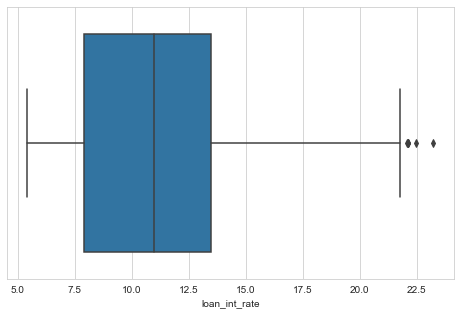

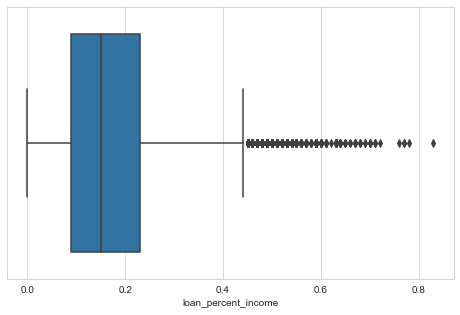

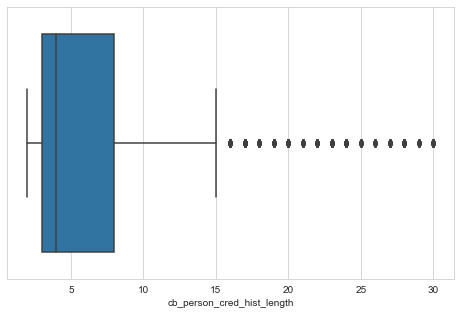

In [6]:
# Cek outlier menggunakan boxplot
columns = df.select_dtypes(exclude=['object'])
columns = columns.drop(['loan_status'], axis=1)
for i in columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(columns[i])

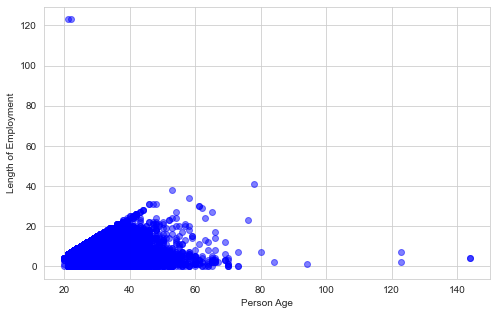

In [7]:
# Cek outlier pada feature person_age dan person_emp_length menggunakan scatterplot
plt.figure(figsize=(8,5))
plt.scatter(df['person_age'], df['person_emp_length'], c='blue', alpha=0.5)
plt.xlabel('Person Age')
plt.ylabel('Length of Employment')
plt.show()

Dilihat dari scatterplot diatas terdapat adanya outlier, karena ada data yang berumur 21 tahun tapi **length of employmentnya** lebih dari 120 tahun. Selain itu, ada data yang berumur 144 tahun.

In [8]:
# Data outlier person_age yang lebih dari 100 tahun
df[df['person_age']>=100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4


In [9]:
# Data outlier person_emp_length yang lebih dari 100 tahun
df[df['person_emp_length']>=100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [10]:
# Jumlah data outlier pada feature person_age
age_outlier = df[df['person_age']>=100]['person_age']
age_outlier.value_counts().sum()

4

In [11]:
# Jumlah data outlier pada feature person_emp_length
age_outlier = df[df['person_emp_length']>=100]['person_emp_length']
age_outlier.value_counts().sum()

2

Karena jumlah outliernya hanya sedikit dari jumlah kesulurahan data, jadi opsi yang saya lakukan adalah drop.

In [12]:
# Drop outlier pada feature person_age
df = df.drop(df[df['person_age'] >= 100].index)

# Drop outlier pada feature person_emp_length
df = df.drop(df[df['person_emp_length'] >= 100].index)

**D) Handling Missing Values**

In [13]:
# Cek missing value
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Missing value pada feature **loan interest rate** diisi menggunakan mean dari masing-masing grade pada feature **loan grade**, karena semakin baik nilai loan grade (A > B > C > D > E > F > G) maka akan semakin kecil interest rate-nya. Bisa dilihat pada pivot table dibawah ini:

In [14]:
# Membuat pivot table feature loan_grade dengan nilai mean loan_int_rate
table = pd.pivot_table(df, index=['loan_grade'], values=['loan_int_rate'], aggfunc='mean')
table['loan_int_rate'] = table['loan_int_rate'].round(decimals=2)
table

,loan_int_rate
loan_grade,
A,7.33
B,11.00
C,13.46
D,15.36
E,17.01
F,18.61
G,20.25


In [15]:
# Fill missing value
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'A', df['loan_int_rate'].fillna(7.33))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'B', df['loan_int_rate'].fillna(11.00))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'C', df['loan_int_rate'].fillna(13.46))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'D', df['loan_int_rate'].fillna(15.36))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'E', df['loan_int_rate'].fillna(17.01))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'F', df['loan_int_rate'].fillna(18.26))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'G', df['loan_int_rate'].fillna(20.25))

**E) Encode Categorical Data**

Karena sebagian besar feature berupa categorical, maka dari itu feature yang berupa categorical tersebut harus diubah terlebih dahulu menjadi numerical agar bisa diproses oleh machine learning.

In [16]:
# Memisahkan columns numerical dengan columns categorical
df_num = df.select_dtypes(exclude=['object'])
df_cat = df.select_dtypes(include=['object'])

In [17]:
# One-hot encoding pada columns categorical 
df_cat_onehot = pd.get_dummies(df_cat)

In [18]:
# Concatenate
df_clean = pd.concat([df_num, df_cat_onehot], axis=1)

In [19]:
# Menampilkan data teratas
df_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [20]:
# Menampilkan informasi dari dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32579
Data columns (total 27 columns):
person_age                        32574 non-null int64
person_income                     32574 non-null int64
person_emp_length                 32574 non-null float64
loan_amnt                         32574 non-null int64
loan_int_rate                     32574 non-null float64
loan_status                       32574 non-null int64
loan_percent_income               32574 non-null float64
cb_person_cred_hist_length        32574 non-null int64
person_home_ownership_MORTGAGE    32574 non-null uint8
person_home_ownership_OTHER       32574 non-null uint8
person_home_ownership_OWN         32574 non-null uint8
person_home_ownership_RENT        32574 non-null uint8
loan_intent_DEBTCONSOLIDATION     32574 non-null uint8
loan_intent_EDUCATION             32574 non-null uint8
loan_intent_HOMEIMPROVEMENT       32574 non-null uint8
loan_intent_MEDICAL               32574 non-null uint8
loan_

### 2. EXPLORATORY DATA ANALYSIS (EDA)

Saya menggunakan 2 cara dalam melakukan EDA, yaitu:
    1. Univariate Analysis untuk memahami masing-masing feature berdasarkan loan_status.
    2. Bivariate Analysis untuk mengetahui korelasi antara dua feature berdasarkan loan_status.
    3. Multivariate Analysis untuk mengetahui korelasi antar feature

**A) Univariate Analysis**

Text(0.5, 1.0, 'Loan Status History')

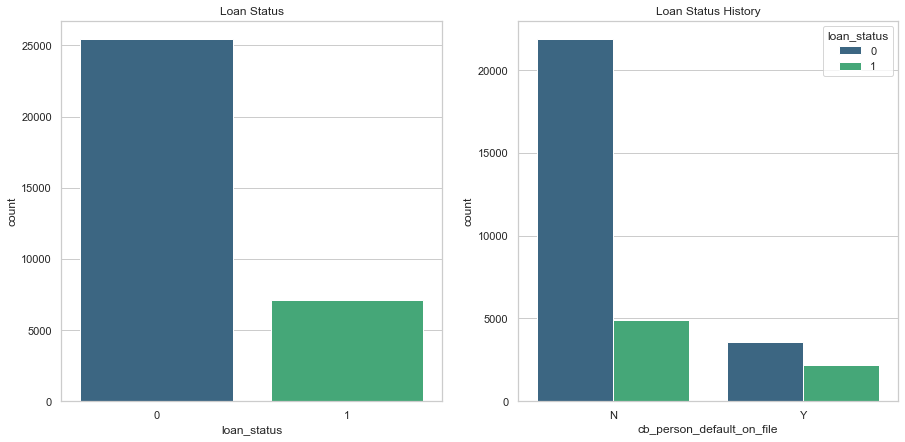

In [21]:
# Create custom figure
sns.set(font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))

# Visualisasi feature loan_status menggunakan countplot
plt.subplot(1,2,1)
sns.countplot(x='loan_status', palette='viridis', data=df)
plt.title('Loan Status')

# Visualisasi feature cb_person_default_on_file menggunakan countplot
plt.subplot(1,2,2)
sns.countplot(x='cb_person_default_on_file', hue='loan_status', palette='viridis', data=df)
plt.title('Loan Status History')

In [22]:
# Membuat cross table loan_status dan cb_person_default_on_file
print(pd.crosstab(df['cb_person_default_on_file'], df['loan_status'], margins = True))

loan_status                    0     1    All
cb_person_default_on_file                    
N                          21894  4936  26830
Y                           3573  2171   5744
All                        25467  7107  32574


#### Kesimpulan:
Debitur yang status creditnya **default** pada pinjaman sebelumnya memiliki **probability of default** pada pinjaman selanjutnya.

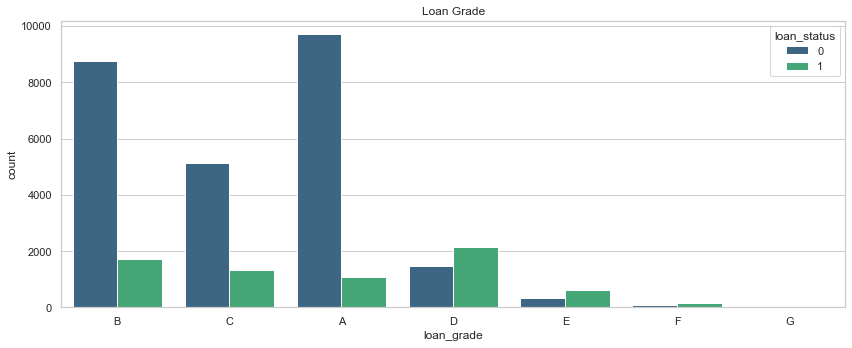

In [23]:
# Visualisasi feature loan_grade menggunakan countplot
plt.figure(figsize=(12,5))
plt.title('Loan Grade')
sns.countplot(x='loan_grade', hue='loan_status', palette='viridis', data=df)
plt.tight_layout()

In [24]:
# Membuat cross table loan_grade and loan_status
print(pd.crosstab(df['loan_grade'], df['loan_status'], margins = True))

loan_status      0     1    All
loan_grade                     
A             9703  1073  10776
B             8747  1701  10448
C             5117  1339   6456
D             1485  2140   3625
E              343   621    964
F               71   170    241
G                1    63     64
All          25467  7107  32574


**Kesimpulan:**

Debitur yang memiliki loan grade A, B, C memiliki **probability of default** yang lebih rendah dibandingkan yang memiliki loan grade D, E, F, G.

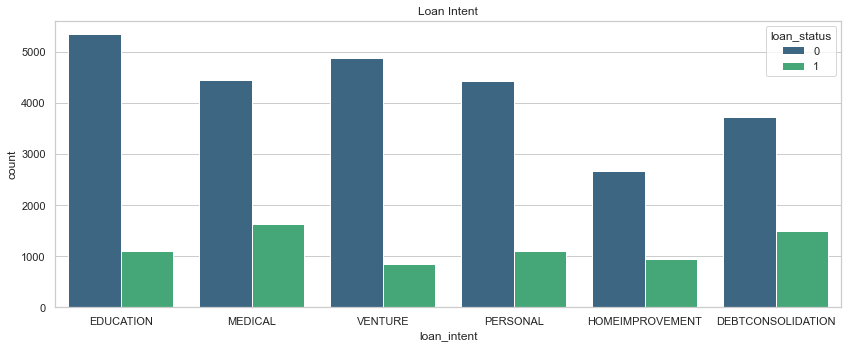

In [25]:
# Visualisasi feature loan_intent menggunakan countplot
plt.figure(figsize=(12,5))
plt.title('Loan Intent')
sns.countplot(x='loan_intent', hue='loan_status', palette='viridis', data=df)
plt.tight_layout()

In [26]:
# Membuat cross table loan_intent dan loan_status
print(pd.crosstab(df['loan_intent'], df['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5340  1111   6451
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4422  1097   5519
VENTURE             4869   847   5716
All                25467  7107  32574


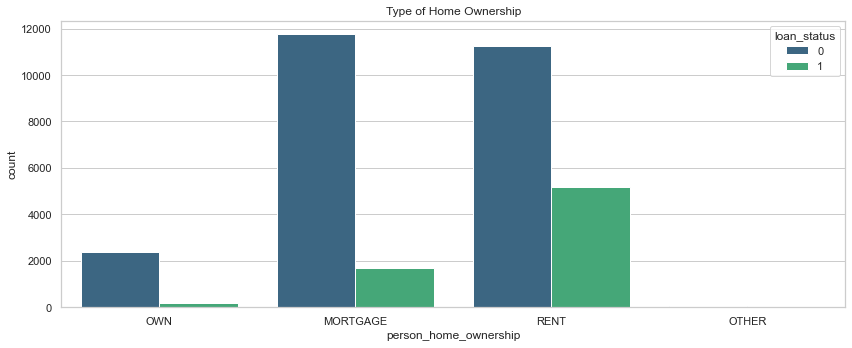

In [27]:
# Visualisasi feature person_home_ownership menggunakan countplot
plt.figure(figsize=(12,5))
plt.title('Type of Home Ownership')
sns.countplot(x='person_home_ownership', hue='loan_status', palette='viridis', data=df)
plt.tight_layout()

In [28]:
# Membuat cross table person_home_ownership dan loan_status
print(pd.crosstab(df['person_home_ownership'], df['loan_status'], margins = True))

loan_status                0     1    All
person_home_ownership                    
MORTGAGE               11751  1690  13441
OTHER                     74    33    107
OWN                     2391   193   2584
RENT                   11251  5191  16442
All                    25467  7107  32574


**B) Bivariate Analysis**
<a id="bivariate_analysis" > </a>

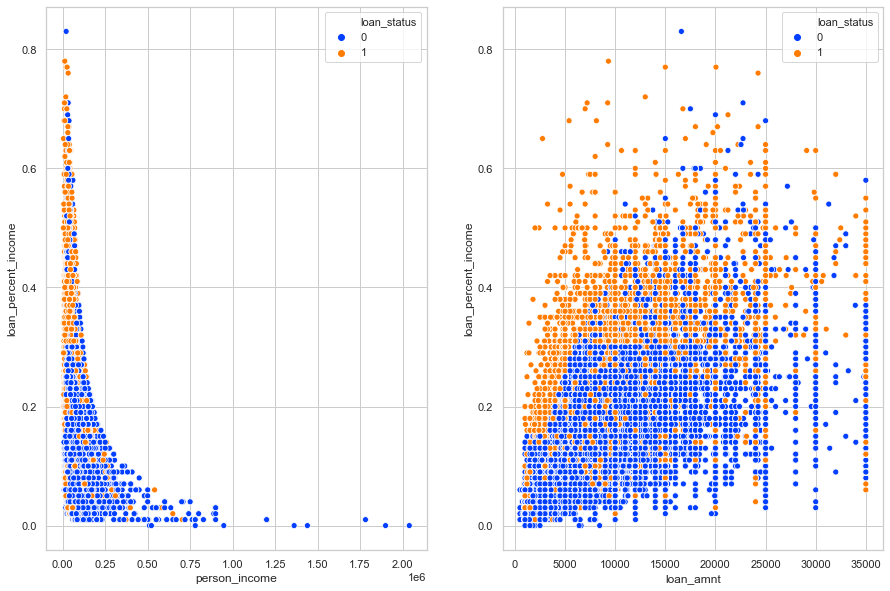

In [29]:
# Membuat custom figure
sns.set(font_scale=1)
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')

# Visualisasi feature person_income dengan loan_percent_income untuk melihat korelasi 
plt.subplot(1,2,1)
sns.scatterplot(x='person_income', y='loan_percent_income', palette='bright',
                hue='loan_status', data=df)
# Visualisasi feature loan_amnt dengan loan_percent_income untuk melihat korelasi
plt.subplot(1,2,2)
sns.scatterplot(x='loan_amnt', y='loan_percent_income', palette='bright',
                hue='loan_status', data=df)

#### Kesimpulan:
* Semakin rendah **person income** semakin tinggi **loan percent income**.
* Semakin tinggi **loan amount** semakin tinggi **loan percent income**.
* Debitur yang memiliki **loan percent income** tinggi memiliki **probability of default** yang tinggi juga. 

    Cara perhitungan **loan percent income** adalah:
    > **loan amount** / **person income**

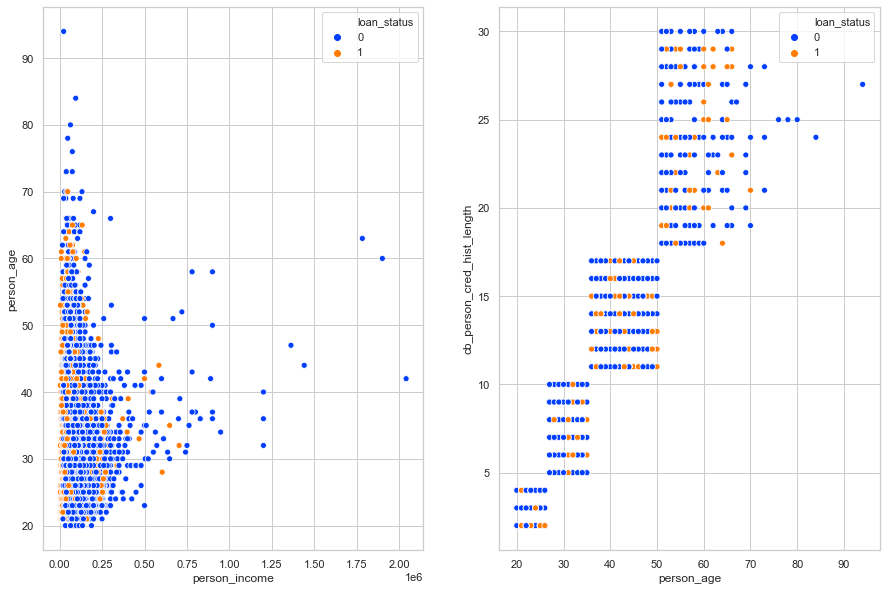

In [30]:
# Membuat custom figure
sns.set(font_scale=1)
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')

# Visualisasi feature person_income dengan person_age untuk melihat korelasi 
plt.subplot(1,2,1)
sns.scatterplot(x='person_income', y='person_age', hue='loan_status',
                palette='bright', data=df)

# Visualisasi feature person_age dengan cb_person_cred_hist_length untuk melihat korelasi 
plt.subplot(1,2,2)
sns.scatterplot(x='person_age', y='cb_person_cred_hist_length', palette='bright',
                hue='loan_status', data=df)

#### Kesimpulan:

   * Peningkatan **age** diiringi dengan peningkatan **income**. Hal ini wajar karena seiring dengan perjalanan karir incomenya akan meningkat.  
   * Peningkatan **age** diiringi dengan peningkatan **credit history length**.

In [31]:
df[['loan_amnt','person_income','person_age']].corr()

,loan_amnt,person_income,person_age
loan_amnt,1.000000,0.317497,0.051751
person_income,0.317497,1.000000,0.140497
person_age,0.051751,0.140497,1.000000


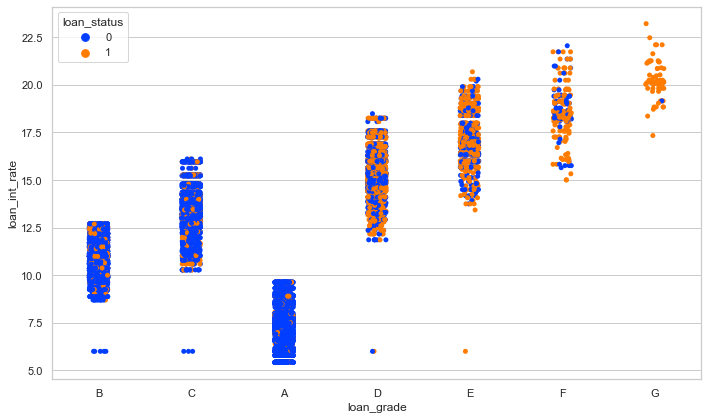

In [32]:
# Visualisasi feature loan_grade dengan loan_int_rate menggunakan stripplot
plt.figure(figsize=(10,6))
sns.stripplot(x='loan_grade', y='loan_int_rate', hue='loan_status', palette='bright', data=df)
plt.tight_layout()
plt.savefig('fii.png')

#### Kesimpulan:

   * Semakin baik **loan grade** semakin rendah **loan interest rate**-nya, karena dari segi resiko debitur yang memiliki grade baik (A, B, dan C) semakin rendah **probability of defaultnya** dibandingkan debitur yang memiliki grade (D, E, F, dan G).
   * Debitur yang memiliki **loan interest rate** tinggi semakin tinggi juga **probability of defaultnya**.

**C) Multivariate Analysis**
<a id="multivariate_analysis" > </a>

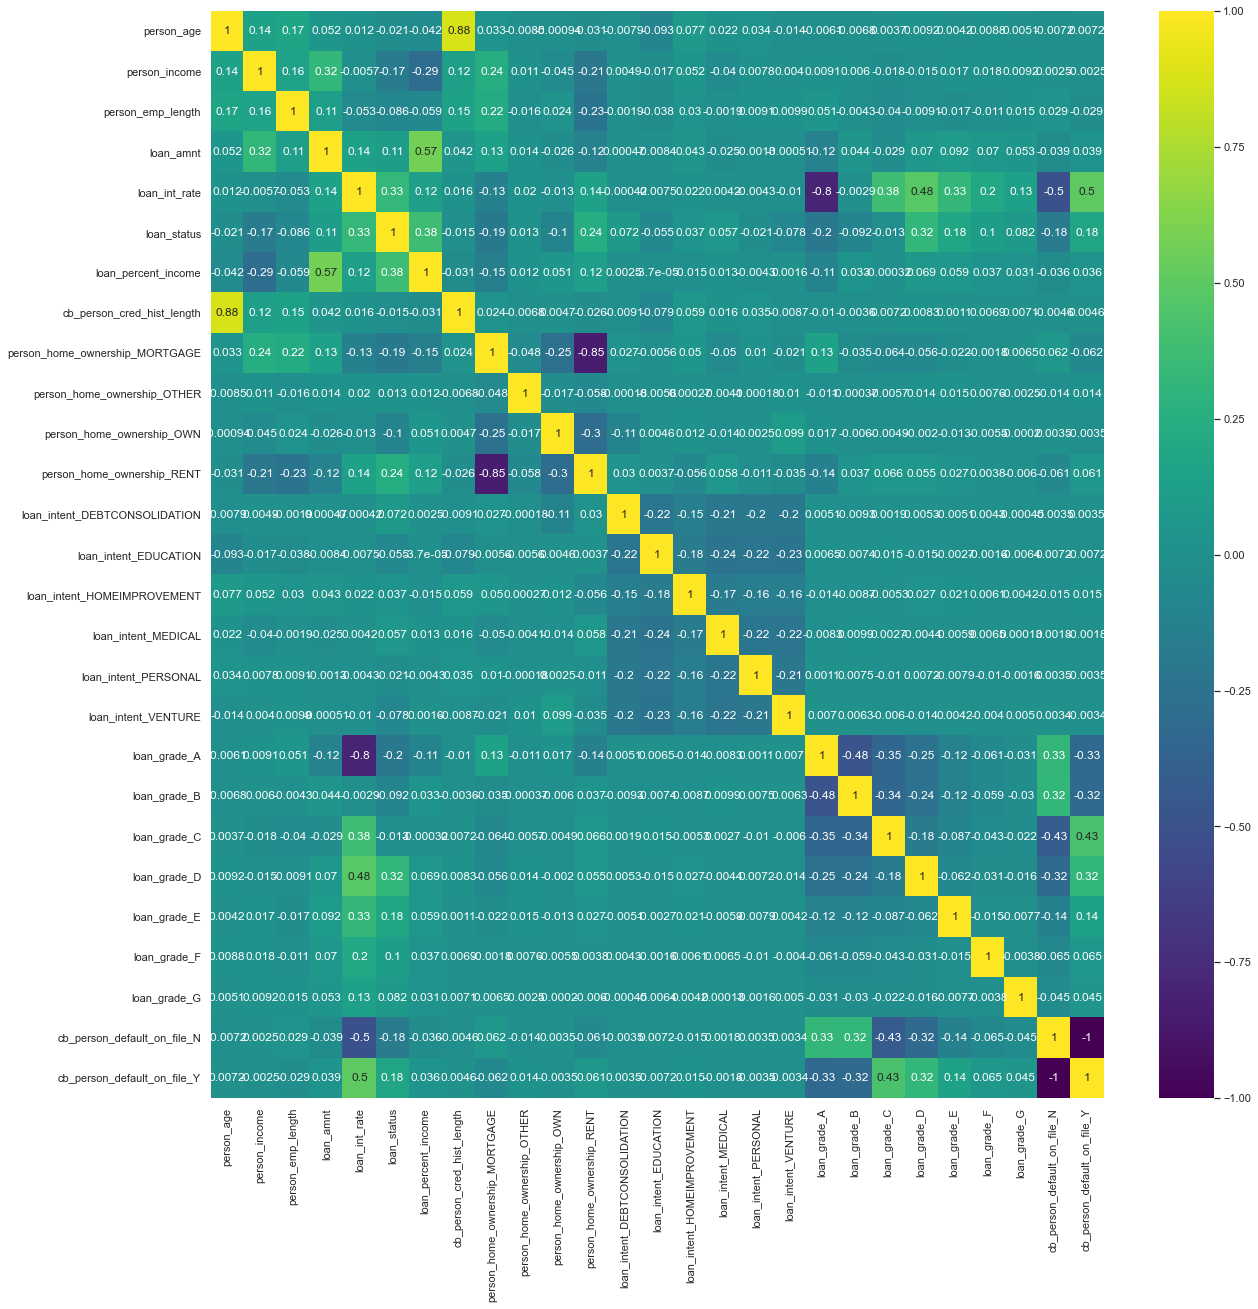

In [33]:
# Visualisasi menggunakan heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr(), cmap='viridis', annot=True)

### 3. MODEL BUILDING & HYPER-PARAMETER TUNING

Outcome dari model machine learning yang saya buat adalah untuk memprediksi apakah suatu pinjaman memiliki resiko **default** atau **non-default**.

* Probability default antara 0 dan 1 (0 = non default, 1 = default) 


 Probability of Default |     Interpretation       | Predicted Loan Status
 -----------------------| -----------------------  |----------------------
0.4                     | Unlikely to default      | 0
0.9                     | Very likely to default   | 1
0.1                     | Very unlikely to default | 0

**A) Feature Selection**

In [34]:
X = df_clean.drop(['loan_status'], axis=1)
y = df_clean['loan_status']

* **Feature Selection using SelectKbest**

In [35]:
# Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # Naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  # Print 10 best features

            Specs         Score
1   person_income  3.873329e+07
3       loan_amnt  1.503011e+06
4   loan_int_rate  3.411030e+03
20   loan_grade_D  2.943448e+03
21   loan_grade_E  1.025643e+03


* **Feature Selection using ExtraTreeClassifier**

[0.06152943 0.11442649 0.07439709 0.08688529 0.08870537 0.21621918
 0.0507279  0.01796152 0.00088641 0.01447352 0.03995041 0.02199935
 0.00999021 0.00992819 0.02029805 0.00807052 0.00866134 0.01391188
 0.00835485 0.02196248 0.06608955 0.02033467 0.00608889 0.00328147
 0.00744316 0.00742277]


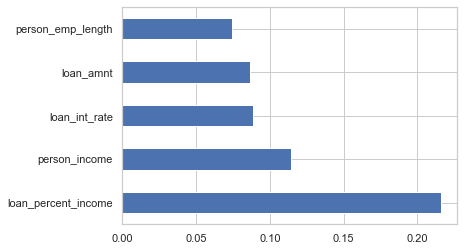

In [36]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) # Use inbuilt class feature_importances of tree based classifiers

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

**B) Feature Scaling**

* **Feature Scaling using Standard Scaler**

In [37]:
standard = StandardScaler()
df_scl = df_clean.drop(['loan_status'], axis=1)
df_scl = standard.fit_transform(X)

In [38]:
df_scl

array([[-1.08276268, -1.07133576,  0.06013987, ..., -0.04436919,
         0.46269721, -0.46269721],
       [-0.43811006, -1.07133576, -0.94460241, ..., -0.04436919,
         0.46269721, -0.46269721],
       [-0.76043637, -0.00720489, -0.1910457 , ..., -0.04436919,
         0.46269721, -0.46269721],
       ...,
       [ 6.00841607,  0.19267658, -0.44223127, ..., -0.04436919,
         0.46269721, -0.46269721],
       [ 4.55794769,  1.60136504,  0.06013987, ..., -0.04436919,
         0.46269721, -0.46269721],
       [ 6.16957923, -0.45455865, -0.69341684, ..., -0.04436919,
         0.46269721, -0.46269721]])

* **Feature Scaling using Robust Scaler**

In [39]:
df_clean.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [40]:
df_robust = df_clean.drop(['loan_status'], axis=1)
robust = RobustScaler()
df_robust = robust.fit_transform(X)

In [41]:
df_robust

array([[-0.71428571, -1.11547912,  0.2       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.14285714, -1.11547912, -0.6       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42857143,  0.25798526,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.57142857,  0.51597052, -0.2       , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.28571429,  2.33415233,  0.2       , ...,  0.        ,
         0.        ,  0.        ],
       [ 5.71428571, -0.31941032, -0.4       , ...,  0.        ,
         0.        ,  0.        ]])

**C) Modeling**

In [42]:
# Load Library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings("ignore")

Saya akan menggunakan 2 algoritma ML, yaitu:
    1. Logistic Regression
    2. Random Forest
    3. XGBoost

* **Logistic Regression**

In [43]:
# Create X and y data for the model use result of feature selection with ExtraTreeClassifier
X = df_clean[['loan_percent_income','person_income','loan_int_rate','loan_amnt','person_emp_length']]
y = df_clean['loan_status']

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Create and train a new logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Print the intercept of the model
print(log_reg.intercept_)

# Print the coeficient of the model
print(log_reg.coef_)

[-1.94530645e-09]
[[ 2.67963667e-09 -4.12701078e-05  9.75995839e-08  1.09127973e-04
  -2.29757337e-08]]


In [44]:
# Create predictions of probability for loan status using test data
lr_preds = log_reg.predict_proba(X_test)

# Create dataframes of first ten predictions, and first ten true labels
lr_preds_df = pd.DataFrame(lr_preds[:,1][:10], columns = ['prob_default'])
lr_true_df = y_test.head(10)

# Concatenate and print the two data frames for comparison
print(pd.concat([lr_true_df.reset_index(drop = True), lr_preds_df], axis = 1))

   loan_status  prob_default
0            0      0.313930
1            0      0.000657
2            0      0.243339
3            0      0.432167
4            0      0.220640
5            0      0.395772
6            0      0.264517
7            0      0.318181
8            0      0.142722
9            1      0.439584


**Kesimpulan:**

Berdasarkan hasil comparison diatas ada yang probability of defaultnya 0.43 tapi aktualnya adalah 0 (non-default) ada juga yang aktualnya 1 (default). Oleh karena itu, saya coba menentukan treshold di titik mana suatu prediksi termasuk non-default atau default lalu dicompare ulang dengan menggunakan confusion matrix dan classification report.

* **Treshold = 0.5**

    Apabila hasil predict_proba > 0.5 maka termasuk **default**.


------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      7619
     Default       0.71      0.17      0.27      2154

    accuracy                           0.80      9773
   macro avg       0.76      0.58      0.58      9773
weighted avg       0.79      0.80      0.75      9773


--------------------- Confusion Matrix ---------------------



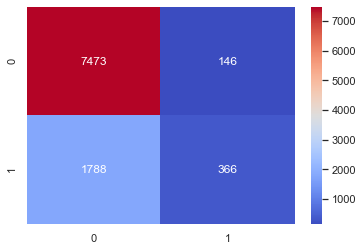

In [45]:
# Create a dataframe for the probabilities of default
lr_preds_df = pd.DataFrame(lr_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, lr_preds_df['loan_status'], target_names=target_names))

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
sns.heatmap(confusion_matrix(y_test, lr_preds_df['loan_status']), cmap='coolwarm', fmt='.4g', annot=True)

**Kesimpulan:**

Hasil dari recall default hanya 0.17, artinya hasil prediksi default dari model yang saya buat hanya 17% benar dari seluruh yang actualnya default. Maka dari itu saya coba untuk menurunkan treshold menjadi 0.4 untuk melihat apakah ada peningkatan recall default. 

* **Treshold = 0.4**

    Apabila hasil predict_proba > 0.4 maka termasuk **default**.


------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      7619
     Default       0.62      0.45      0.53      2154

    accuracy                           0.82      9773
   macro avg       0.74      0.69      0.71      9773
weighted avg       0.81      0.82      0.81      9773


--------------------- Confusion Matrix ---------------------



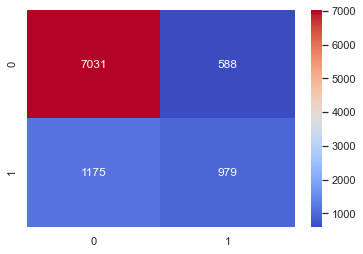

In [46]:
# Create a dataframe for the probabilities of default
lr_preds_df = pd.DataFrame(lr_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, lr_preds_df['loan_status'], target_names=target_names))

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
sns.heatmap(confusion_matrix(y_test, lr_preds_df['loan_status']), cmap='coolwarm', fmt='.4g', annot=True)

**Kesimpulan:**

Terdapat peningkatan recall default dari 0.17 ke 0.46. 

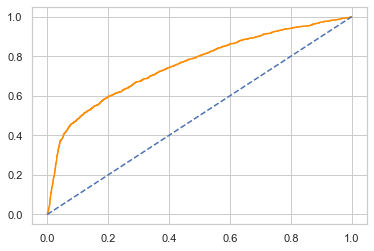

Accuracy Score: 0.8021078481530748
AUC Score: 0.7563946082114268


In [47]:
# Plot the ROC curve of the probabilities of default
lr_prob_default = lr_preds[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, lr_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Print the accuracy score the model
lr_acc_score = log_reg.score(X_test, y_test)
print('Accuracy Score: ' + str(lr_acc_score))

# Compute the AUC and store it in a variable
lr_auc_score = roc_auc_score(y_test, lr_prob_default)
print('AUC Score: ' + str(lr_auc_score))

* **Default Recall Impact**

Menghitung **unexpected loss** berdasarkan **default recall**.

* **Treshold = 0.4**

In [48]:
# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, lr_preds_df['loan_status'], target_names=target_names))

# Print average loan amount
print('\n' + '\033[1m' + ' Average Loan Amount '.center(60,'-') + '\033[0m' + '\n')
print(df_clean['loan_amnt'].mean())


------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      7619
     Default       0.62      0.45      0.53      2154

    accuracy                           0.82      9773
   macro avg       0.74      0.69      0.71      9773
weighted avg       0.81      0.82      0.81      9773


------------------- Average Loan Amount --------------------

9588.018051206484


Dari hasil confusion matrix dan classification report di atas diketahui:

- Number True of Default = **2154** (Hasil dari TP + FN)

- Recall Default = **45%** (Hasil dari TP / (TP + FN))

- Not Predicted = **55%** 

Loan Amount | Default Predicted / Not Predicted| Estimated Loss on Default
------------|----------------------------------|----------------------------
$ 9588      |       0.45/0.55                  | (2154 x 0.55) x 9588   
                                               
                                                                                  $11.358.903

* **Treshold = 0.5**

In [49]:
# Average loan amount
avg_loan_amnt = df_clean['loan_amnt'].mean() 

# Reassign the values of loan status based on the new threshold
lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Store the number of actual loan defaults 
num_defaults = y_test.value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test, lr_preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

17143376.27555719


In [50]:
# Selisih antara treshold 0.5 dengan treshold 0.4
11358903 - 17143376 

-5784473

**Kesimpulan:**

Terdapat perbedaan yang signifikan antara treshold 0.5 dan treshold 0.4. Hal ini sangat penting untuk meningkatkan recall default agar bisa mengurangi potensi kerugian perusahaan.  

* **Threshold Selection**

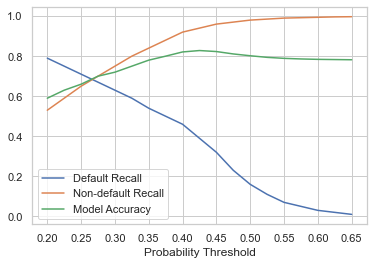

In [51]:
thresh = [0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4,
          0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65]
def_recalls = [0.79, 0.75, 0.71, 0.67, 0.63, 0.59, 0.54, 0.50, 0.46, 
              0.39, 0.32, 0.23, 0.16, 0.11, 0.07, 0.05, 0.03, 0.02, 0.01]
nondef_recalls = [0.53, 0.59, 0.65, 0.70, 0.75, 0.80, 0.84, 0.88, 0.92, 
                  0.94,0.96, 0.97, 0.980, 0.985, 0.990, 0.992, 0.994, 0.996, 0.997]
accs = [0.59, 0.63, 0.66, 0.70, 0.72, 0.75, 0.78, 0.80, 0.821, 0.828, 0.823, 
        0.811, 0.802, 0.794, 0.789, 0.786, 0.784,0.783, 0.782]
ticks = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

* **Random Forest Classifier**

In [52]:
# Create a new XGBoost
rf = RandomForestClassifier().fit(X_train, y_train)

# Predict with a model
rf_preds = rf.predict_proba(X_test)

# Create dataframes of first ten predictions, and first ten true labels
rf_preds_df = pd.DataFrame(rf_preds[:,1][0:10], columns = ['prob_default'])
rf_true_df = y_test.head(10)

# Concatenate and print the two data frames for comparison
print(pd.concat([rf_true_df.reset_index(drop = True), rf_preds_df], axis = 1))

   loan_status  prob_default
0            0          0.19
1            0          0.04
2            0          0.02
3            0          0.20
4            0          0.02
5            0          0.18
6            0          0.05
7            0          0.21
8            0          0.00
9            1          0.60


* **Threshold = 0.5**


------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.90      0.95      0.92      7619
     Default       0.77      0.63      0.69      2154

    accuracy                           0.88      9773
   macro avg       0.83      0.79      0.81      9773
weighted avg       0.87      0.88      0.87      9773


--------------------- Confusion Matrix ---------------------



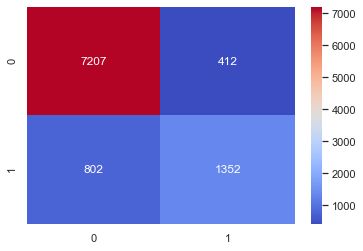

In [53]:
# Create a dataframe for the probabilities of default
rf_preds_df = pd.DataFrame(rf_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
rf_preds_df['loan_status'] = rf_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, rf_preds_df['loan_status'], target_names=target_names))

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
sns.heatmap(confusion_matrix(y_test, rf_preds_df['loan_status']), cmap='coolwarm', fmt='.4g', annot=True)

* **Threshold = 0.4**


------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.92      0.92      0.92      7619
     Default       0.71      0.70      0.71      2154

    accuracy                           0.87      9773
   macro avg       0.81      0.81      0.81      9773
weighted avg       0.87      0.87      0.87      9773


--------------------- Confusion Matrix ---------------------



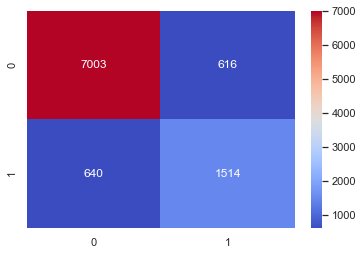

In [54]:
# Create a dataframe for the probabilities of default
rf_preds_df = pd.DataFrame(rf_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
rf_preds_df['loan_status'] = rf_preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, rf_preds_df['loan_status'], target_names=target_names))

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
sns.heatmap(confusion_matrix(y_test, rf_preds_df['loan_status']), cmap='coolwarm', fmt='.4g', annot=True)

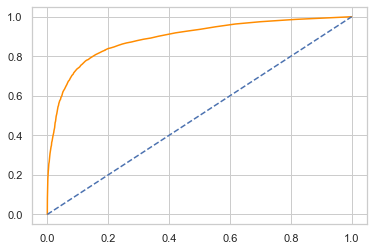

Accuracy Score: 0.8757802107848153
AUC Score: 0.8920205168065031


In [55]:
# Plot the ROC curve of the probabilities of default
rf_prob_default = rf_preds[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, rf_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Print the accuracy score the model
rf_acc_score = rf.score(X_test, y_test)
print('Accuracy Score: ' + str(rf_acc_score))

# Compute the AUC and store it in a variable
rf_auc_score = roc_auc_score(y_test, rf_prob_default)
print('AUC Score: ' + str(rf_auc_score))

* **XGBOOST**

In [56]:
# Create a new XGBoost
gbt = xgb.XGBClassifier().fit(X_train, y_train)

# Predict with a model
gbt_preds = gbt.predict_proba(X_test)

# Create dataframes of first ten predictions, and first ten true labels
gbt_preds_df = pd.DataFrame(gbt_preds[:,1][0:10], columns = ['prob_default'])
gbt_true_df = y_test.head(10)

# Concatenate and print the two data frames for comparison
print(pd.concat([gbt_true_df.reset_index(drop = True), gbt_preds_df], axis = 1))

   loan_status  prob_default
0            0      0.375797
1            0      0.016076
2            0      0.084966
3            0      0.092744
4            0      0.024453
5            0      0.121078
6            0      0.042531
7            0      0.228830
8            0      0.004935
9            1      0.616500


In [57]:
# Print the column importances from the model
print(gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 529, 'loan_int_rate': 880, 'person_income': 1230, 'person_emp_length': 499, 'loan_amnt': 443}


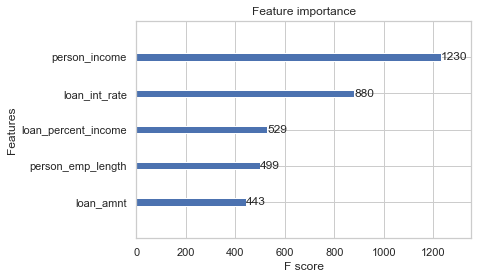

In [58]:
xgb.plot_importance(gbt, importance_type = 'weight')
plt.show()

* **Treshold = 0.5**


------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.90      0.94      0.92      7619
     Default       0.75      0.64      0.69      2154

    accuracy                           0.87      9773
   macro avg       0.83      0.79      0.81      9773
weighted avg       0.87      0.87      0.87      9773


--------------------- Confusion Matrix ---------------------



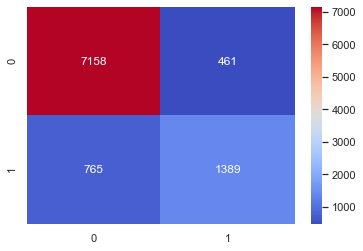

In [59]:
# Create a dataframe for the probabilities of default
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
gbt_preds_df['loan_status'] = gbt_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, gbt_preds_df['loan_status'], target_names=target_names))

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
sns.heatmap(confusion_matrix(y_test, gbt_preds_df['loan_status']), cmap='coolwarm', fmt='.4g', annot=True)

* **Treshold = 0.4**


------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.92      0.92      0.92      7619
     Default       0.72      0.70      0.71      2154

    accuracy                           0.87      9773
   macro avg       0.82      0.81      0.81      9773
weighted avg       0.87      0.87      0.87      9773


--------------------- Confusion Matrix ---------------------



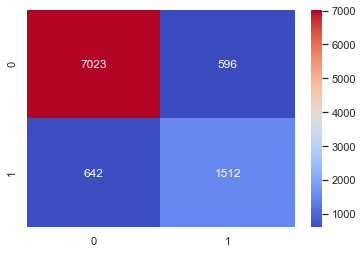

In [60]:
# Create a dataframe for the probabilities of default
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
gbt_preds_df['loan_status'] = gbt_preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, gbt_preds_df['loan_status'], target_names=target_names))

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
sns.heatmap(confusion_matrix(y_test, gbt_preds_df['loan_status']), cmap='coolwarm', fmt='.4g', annot=True)

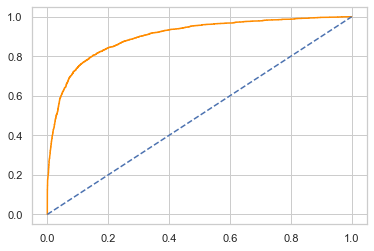

Accuracy Score: 0.8745523380742863
AUC Score: 0.9013788404422652


In [61]:
# Plot the ROC curve of the probabilities of default
gbt_prob_default = gbt_preds[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, gbt_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Print the accuracy score the model
gbt_acc_score = gbt.score(X_test, y_test)
print('Accuracy Score: ' + str(gbt_acc_score))

# Compute the AUC and store it in a variable
gbt_auc_score = roc_auc_score(y_test, gbt_prob_default)
print('AUC Score: ' + str(gbt_auc_score))

* **Score Comparison**

In [62]:
compare2 = pd.DataFrame([lr_acc_score, gbt_acc_score, rf_acc_score, lr_auc_score, gbt_auc_score, rf_auc_score]).transpose()
compare2.rename(columns={0 : 'lr_acc_score', 1 : 'gbt_acc_score', 2: 'rf_acc_score', 
                         3 :'lr_auc_score', 4 :'gbt_auc_score', 5 :'rf_auc_score'})

,lr_acc_score,gbt_acc_score,rf_acc_score,lr_auc_score,gbt_auc_score,rf_auc_score
0,0.802108,0.874552,0.87578,0.756395,0.901379,0.892021


**D) Cross Validation**

* **Logisitic Regression - Cross Validation**

In [63]:
# Evaluate using Cross Validation
num_folds = 10
seed = 101
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(log_reg, X_train, y_train, cv=kfold)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.81323981 0.80657895 0.79780702 0.80701754 0.80614035 0.83947368
 0.80482456 0.80833333 0.80482456 0.81008772]


In [64]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7978070175438596, 0.8098327526400393, 0.8394736842105263)

* **Random Forest - Cross Validation**

In [65]:
# Evaluate using Cross Validation
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(rf, X_train, y_train, cv=kfold)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.86716352 0.88464912 0.8622807  0.87280702 0.86929825 0.88815789
 0.87368421 0.87763158 0.87412281 0.88421053]


In [66]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.862280701754386, 0.8754005630032996, 0.8881578947368421)

* **XGBoost - Cross Validation**

In [67]:
# Set parameter
params = {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}

# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 100, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df[:10])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.880458       0.001840       0.873056      0.006843
1        0.888024       0.002274       0.880204      0.006839
2        0.890962       0.002305       0.883168      0.007267
3        0.892705       0.001893       0.884017      0.007879
4        0.895325       0.002007       0.886104      0.007219
5        0.897359       0.002219       0.886909      0.007133
6        0.899890       0.002009       0.888087      0.006675
7        0.903071       0.002913       0.889345      0.006059
8        0.905549       0.002254       0.890574      0.006469
9        0.907999       0.002149       0.891853      0.006219


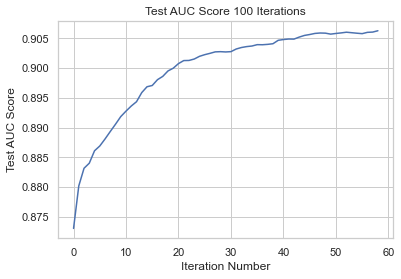

In [68]:
# Plot the test AUC scores for each iteration
plt.plot(cv_df['test-auc-mean'])
plt.title('Test AUC Score 100 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

**Kesimpulan:**

**train-auc-mean** dan **test-auc-mean** meningkat pada setiap iterasi cross-validation. 

**E) Hyper-Parameter Tuning**

* **Logistic Regression - Hyper-Parameter Tuning**

In [69]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

params = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
params

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [70]:
model_lr = LogisticRegression()
model_lr_gs = GridSearchCV(model_lr, params, cv = 5)
model_lr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [71]:
model_lr_gs.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [72]:
# Create and train a new logistic regression
log_reg_hyper = LogisticRegression(max_iter=1000, penalty='l2', solver='newton-cg').fit(X_train, y_train)

# Print the intercept of the model
print(log_reg_hyper.intercept_)

# Print the coeficient of the model
print(log_reg_hyper.coef_)

[-6.03653221]
[[ 1.09052214e+01 -1.85325864e-06  3.10069397e-01 -7.79555323e-05
  -2.50145290e-02]]


In [73]:
# Create predictions of probability for loan status using test data
lr_preds_hyper = log_reg_hyper.predict_proba(X_test)

# Create dataframes of first ten predictions, and first ten true labels
lr_preds_df_hyper = pd.DataFrame(lr_preds_hyper[:,1][:10], columns = ['prob_default'])
lr_true_df_hyper = y_test.head(10)

# Concatenate and print the two data frames for comparison
print(pd.concat([lr_true_df_hyper.reset_index(drop = True), lr_preds_df_hyper], axis = 1))

   loan_status  prob_default
0            0      0.275231
1            0      0.060116
2            0      0.183292
3            0      0.272013
4            0      0.052242
5            0      0.608369
6            0      0.088503
7            0      0.115451
8            0      0.032812
9            1      0.567121



------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.87      0.91      0.89      7619
     Default       0.62      0.52      0.57      2154

    accuracy                           0.82      9773
   macro avg       0.74      0.72      0.73      9773
weighted avg       0.81      0.82      0.82      9773


--------------------- Confusion Matrix ---------------------



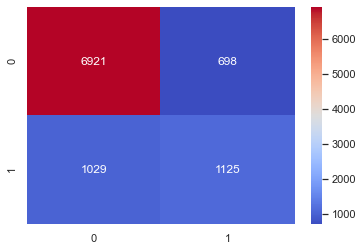

In [74]:
# Create a dataframe for the probabilities of default
lr_preds_df_hyper = pd.DataFrame(lr_preds_hyper[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
lr_preds_df_hyper['loan_status'] = lr_preds_df_hyper['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, lr_preds_df_hyper['loan_status'], target_names=target_names))

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
sns.heatmap(confusion_matrix(y_test, lr_preds_df_hyper['loan_status']), cmap='coolwarm', fmt='.4g', annot=True)

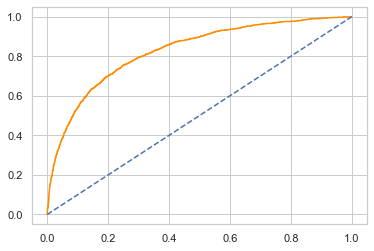

Accuracy Score: 0.8745523380742863
AUC Score: 0.8267643028966702


In [75]:
# Plot the ROC curve of the probabilities of default
lr_prob_default_hyper = lr_preds_hyper[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, lr_prob_default_hyper)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Print the accuracy score the model
lr_acc_score_hyper = gbt.score(X_test, y_test)
print('Accuracy Score: ' + str(lr_acc_score_hyper))

# Compute the AUC and store it in a variable
lr_auc_score_hyper = roc_auc_score(y_test, lr_prob_default_hyper)
print('AUC Score: ' + str(lr_auc_score_hyper))

**Kesimpulan:**

Ada peningkatan performa model machine learning setelah hyper-parameter tuning

* **Random Forest - Hyper-Parameter Tuning**

In [76]:
param_grid = [{'n_estimators': [10, 20, 30, 40, 50], 'max_features': [5, 10], 
               'max_depth': [10, 20, 30, 40, 50],'bootstrap': [True, False]}]

In [77]:
model_rf = RandomForestClassifier()
model_rf_gs = GridSearchCV(model_rf, param_grid, cv = 5)
model_rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [78]:
model_rf_gs.best_params_

{'bootstrap': True, 'max_depth': 30, 'max_features': 5, 'n_estimators': 40}

In [79]:
# Create and train a new XGBoost
rf_hyper = RandomForestClassifier(bootstrap=True, max_depth=None, max_features=5, n_estimators=25).fit(X_train, y_train)

# Create predictions of probability for loan status using test data
rf_preds_hyper = rf_hyper.predict_proba(X_test)

# Create dataframes of first ten predictions, and first ten true labels
rf_preds_df_hyper = pd.DataFrame(rf_preds_hyper[:,1][:10], columns = ['prob_default'])
rf_true_df_hyper = y_test.head(10)

# Concatenate and print the two data frames for comparison
print(pd.concat([rf_true_df_hyper.reset_index(drop = True), rf_preds_df_hyper], axis = 1))

   loan_status  prob_default
0            0          0.40
1            0          0.00
2            0          0.16
3            0          0.32
4            0          0.04
5            0          0.28
6            0          0.00
7            0          0.24
8            0          0.00
9            1          0.44



------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.91      0.92      0.92      7619
     Default       0.70      0.70      0.70      2154

    accuracy                           0.87      9773
   macro avg       0.81      0.81      0.81      9773
weighted avg       0.87      0.87      0.87      9773


--------------------- Confusion Matrix ---------------------



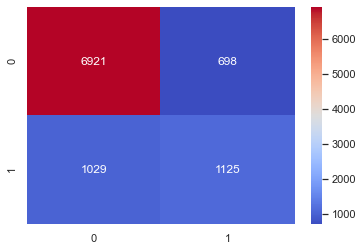

In [80]:
# Create a dataframe for the probabilities of default
rf_preds_df_hyper = pd.DataFrame(rf_preds_hyper[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
rf_preds_df_hyper['loan_status'] = rf_preds_df_hyper['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, rf_preds_df_hyper['loan_status'], target_names=target_names))

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
sns.heatmap(confusion_matrix(y_test, lr_preds_df_hyper['loan_status']), cmap='coolwarm', fmt='.4g', annot=True)

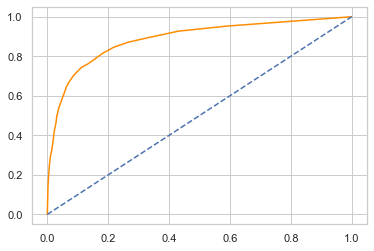

Accuracy Score: 0.8757802107848153
AUC Score: 0.8865071597505283


In [81]:
# Plot the ROC curve of the probabilities of default
rf_prob_default_hyper = rf_preds_hyper[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, rf_prob_default_hyper)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Print the accuracy score the model
rf_acc_score_hyper = rf.score(X_test, y_test)
print('Accuracy Score: ' + str(rf_acc_score_hyper))

# Compute the AUC and store it in a variable
rf_auc_score_hyper = roc_auc_score(y_test, rf_prob_default_hyper)
print('AUC Score: ' + str(rf_auc_score_hyper))

**Kesimpulan:**

Tidak ada peningkatan performa model machine learning setelah hyper-parameter tuning.

* **XGBoost - Hyper-Parameter Tuning**

In [82]:
params = {'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5]}

In [83]:
model_gbt = xgb.XGBClassifier()
model_gbt_gs = GridSearchCV(model_gbt, params, cv = 10)
model_gbt_gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
           

In [84]:
model_gbt_gs.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 1.0}

In [85]:
# Create and train a new XGBoost
gbt_hyper = xgb.XGBClassifier(colsample_bytree = 0.8, gamma = 0.5, max_depth = 5, 
                              min_child_weight = 1, subsample = 1.0).fit(X_train, y_train)

# Create predictions of probability for loan status using test data
gbt_preds_hyper = gbt_hyper.predict_proba(X_test)

# Create dataframes of first ten predictions, and first ten true labels
gbt_preds_df_hyper = pd.DataFrame(gbt_preds_hyper[:,1][:10], columns = ['prob_default'])
gbt_true_df_hyper = y_test.head(10)

# Concatenate and print the two data frames for comparison
print(pd.concat([gbt_true_df_hyper.reset_index(drop = True), gbt_preds_df_hyper], axis = 1))

   loan_status  prob_default
0            0      0.310116
1            0      0.030535
2            0      0.122475
3            0      0.078221
4            0      0.045618
5            0      0.163706
6            0      0.059955
7            0      0.136724
8            0      0.005276
9            1      0.368646



------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.91      0.92      0.92      7619
     Default       0.72      0.69      0.71      2154

    accuracy                           0.87      9773
   macro avg       0.82      0.81      0.81      9773
weighted avg       0.87      0.87      0.87      9773


--------------------- Confusion Matrix ---------------------



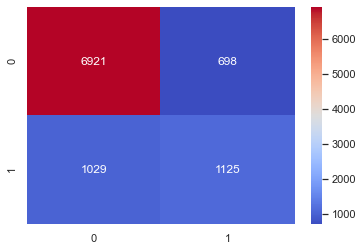

In [86]:
# Create a dataframe for the probabilities of default
gbt_preds_df_hyper = pd.DataFrame(gbt_preds_hyper[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
gbt_preds_df_hyper['loan_status'] = gbt_preds_df_hyper['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, gbt_preds_df_hyper['loan_status'], target_names=target_names))

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
sns.heatmap(confusion_matrix(y_test, lr_preds_df_hyper['loan_status']), cmap='coolwarm', fmt='.4g', annot=True)

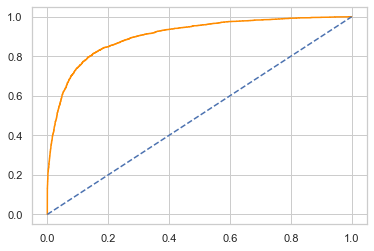

Accuracy Score: 0.8745523380742863
AUC Score: 0.9037603969356285


In [87]:
# Plot the ROC curve of the probabilities of default
gbt_prob_default_hyper = gbt_preds_hyper[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, gbt_prob_default_hyper)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Print the accuracy score the model
gbt_acc_score_hyper = gbt.score(X_test, y_test)
print('Accuracy Score: ' + str(gbt_acc_score_hyper))

# Compute the AUC and store it in a variable
gbt_auc_score_hyper = roc_auc_score(y_test, gbt_prob_default_hyper)
print('AUC Score: ' + str(gbt_auc_score_hyper))

**Kesimpulan:**

Tidak ada peningkatan performa model machine learning setelah hyper-parameter tuning.

### 4. MODEL EVALUATION & IMPLEMENTATION

**A) Comparing Model Report**

In [88]:
# Print the logistic regression classification report
print('\n' + '\033[1m' + ' Logistic Regression '.center(60,'-') + '\033[0m' + '\n')
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, lr_preds_df_hyper['loan_status'], target_names=target_names))

# Print the random forest classifier classification report
print('\n' + '\033[1m' + ' Random Forest Classifier '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, rf_preds_df_hyper['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print('\n' + '\033[1m' + ' XGBoost '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, gbt_preds_df_hyper['loan_status'], target_names=target_names))


------------------- Logistic Regression --------------------

              precision    recall  f1-score   support

 Non-Default       0.87      0.91      0.89      7619
     Default       0.62      0.52      0.57      2154

    accuracy                           0.82      9773
   macro avg       0.74      0.72      0.73      9773
weighted avg       0.81      0.82      0.82      9773


----------------- Random Forest Classifier -----------------

              precision    recall  f1-score   support

 Non-Default       0.91      0.92      0.92      7619
     Default       0.70      0.70      0.70      2154

    accuracy                           0.87      9773
   macro avg       0.81      0.81      0.81      9773
weighted avg       0.87      0.87      0.87      9773


------------------------- XGBoost --------------------------

              precision    recall  f1-score   support

 Non-Default       0.91      0.92      0.92      7619
     Default       0.72      0.69      0.71     

**B) Comparing with ROC**

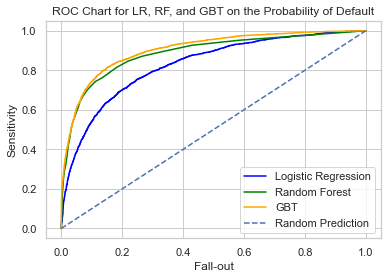

In [89]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, lr_preds_hyper[:,1])
fallout_rf, sensitivity_rf, thresholds_rf = roc_curve(y_test, rf_preds_hyper[:,1])
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt_preds_hyper[:,1])

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_rf, sensitivity_rf, color = 'green', label='%s' % 'Random Forest')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'orange', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR, RF, and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

**C) Acceptance Rates**

Menentukan presentase penerimaan pinjaman baru (accepted loan).

In [90]:
# Check the statistics of the probabilities of default
print(gbt_preds_df_hyper['prob_default'].describe())
print('\n')

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(gbt_preds_df_hyper['prob_default'], 0.85)

# Apply acceptance rate threshold
gbt_preds_df_hyper['loan_status_accepted'] = gbt_preds_df_hyper['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the total loan accepted
print('Total loan received is')
print(sum(gbt_preds_df_hyper['loan_status_accepted'].value_counts()))
print('\n')

# Print the counts of loan status accepted
print('loan status')
print(gbt_preds_df_hyper['loan_status_accepted'].value_counts())

count    9773.000000
mean        0.221602
std         0.289740
min         0.000475
25%         0.025211
50%         0.075963
75%         0.300950
max         0.999714
Name: prob_default, dtype: float64


Total loan received is
9773


loan status
0    8307
1    1466
Name: loan_status_accepted, dtype: int64


**Kesimpulan:**

Dari seluruh total pinjaman yang diterima ada 8307 yang statusnya non-default dan 1466 default.

**Visualizing Acceptance Rates**

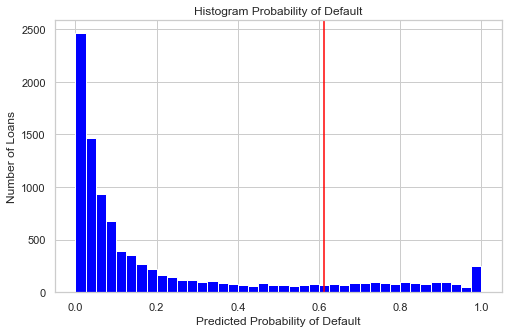

In [91]:
# Plot the predicted probabilities of default
plt.figure(figsize=(8,5))
plt.hist(gbt_preds_df_hyper['prob_default'], color = 'blue', bins = 40)
plt.title('Histogram Probability of Default')
plt.xlabel('Predicted Probability of Default')
plt.ylabel('Number of Loans')

# Calculate the threshold with quantile
threshold = np.quantile(gbt_preds_df_hyper['prob_default'], 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

**Keterangan:**
  
* Sisi kiri dari garis merah adalah pinjaman yang diterima
* Sisi kanan dari garis merah adalah pinjaman yang ditolak

Dari visualisasi diatas dapat diketahui jumlah pinjaman yang ditolak dan diterima berdasarkan treshold tertentu.

**D) Bad Rates**

Menghitung persentase pinjaman **default** dari seluruh pinjaman yang diterima.

* **Rumus:**

    Bad Rate = Accepted Default / Total Accepted Loans

In [92]:
# Create a subset of only accepted loans
num_of_default = gbt_preds_df_hyper[gbt_preds_df_hyper['loan_status_accepted'] == 1]['loan_status_accepted'].sum()
num_of_accepted_loan = gbt_preds_df_hyper['loan_status_accepted'].value_counts().sum()

# Calculate the bad rate
bad_rate = np.sum(num_of_default / num_of_accepted_loan).round(2)
bad_rate

0.15

**Kesimpulan:**
    
Total persentase dari seluruh pinjaman yang diterima ada 15% yang default

**E) Expected Loss**

**Rumus:** 

Expected Loss = PD x LGD x EAD

* **Probability of Default (PD):** Besarnya kemungkinan debitur default

* **Loss Given Default (LGD):** Estimasi potensi kerugian jika terjadi default. Besar LGD adalah (1 - *recovery rate*). *recovery rate* adalah pengembalian kredit setelah dilakukan upaya penagihan atau penjualan agunan atas kredit macet.

* **Exposure at Default:** Estimasi besarnya eksposure kredt pada saat default.

In [93]:
# LGD = Berdasarkan rata-rata total loan amount
gbt_preds_df_hyper['exposure_at_default'] = X_test['loan_amnt'].copy().mean()

# EAD = Asumsi bahwa setiap pinjaman yang default akan loss 100%
LGD = [1.0] * 9773 # Jumlah debitur
gbt_preds_df_hyper['loss_given_default'] = LGD

In [94]:
# Calculate the bank's expected loss and assign it to a new column
gbt_preds_df_hyper['expected_loss'] = gbt_preds_df_hyper['prob_default'] * gbt_preds_df_hyper['loss_given_default'] * gbt_preds_df_hyper['exposure_at_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(gbt_preds_df_hyper['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

Total expected loss:  $20,770,867.13


**Overall Conclusion:**

Project ini masih berfokus pada memprediksi probability of default (PD), sehingga EAD dan LGD masih menggunakan asumsi bahwa setiap debitur yang default akan loss 100% dari nilai pinjaman sehingga kedepannya masih bisa disempurnakan, contohnya dengan memprediksi besaran EAD dan LGD dari setiap debitur yang default menggunakan linear regression agar hasil expected loss lebih akurat.